In [33]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

from tensorflow.keras.preprocessing import image
from PIL import Image
import PIL
from tensorflow.keras import layers
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np 
import cv2
import os


In [2]:
train=ImageDataGenerator (rescale=1/255)
validation=ImageDataGenerator (rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('mask_detection/train/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=train.flow_from_directory('mask_detection/test/',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 1606 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'with_mask': 0, 'without_mask': 1}

In [5]:
validation_dataset.class_indices

{'with_mask': 0, 'without_mask': 1}

In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Flatten(),
                                  #
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                 ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
H=model.fit_generator(train_dataset,
                      steps_per_epoch=10,
                      epochs=30,
                      validation_data = validation_dataset);
#H=model.fit_generator(train_dataset,
 #                        samples_per_epoch=1212, # Total training images
#                         nb_epoch = 20, # Total no. of epochs
 #                        validation_data = validation_dataset)
                        # nb_val_samples = 300) # Total testing images

Epoch 1/30
10/10 [==============================] - 22s 2s/step - loss: 2.5744 - acc: 0.4333 - val_loss: 0.7243 - val_acc: 0.5000
Epoch 2/30
10/10 [==============================] - 11s 1s/step - loss: 0.7879 - acc: 0.5667 - val_loss: 0.6662 - val_acc: 0.5258
Epoch 3/30
10/10 [==============================] - 12s 1s/step - loss: 0.7170 - acc: 0.5333 - val_loss: 0.6315 - val_acc: 0.8454
Epoch 4/30
10/10 [==============================] - 13s 1s/step - loss: 0.5900 - acc: 0.7667 - val_loss: 1.3471 - val_acc: 0.5000
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 0.6068 - acc: 0.6333 - val_loss: 0.4089 - val_acc: 0.7990
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 0.4844 - acc: 0.9333 - val_loss: 0.2676 - val_acc: 0.9433
Epoch 7/30
10/10 [==============================] - 12s 1s/step - loss: 0.2500 - acc: 0.9000 - val_loss: 0.1787 - val_acc: 0.9227
Epoch 8/30
10/10 [==============================] - 11s 1s/step - loss: 0.4763 - acc: 0.90

10/10 [==============================] - 11s 1s/step - loss: 0.0963 - acc: 0.9333 - val_loss: 0.2317 - val_acc: 0.9124
Epoch 19/30
10/10 [==============================] - 11s 1s/step - loss: 0.5454 - acc: 0.8667 - val_loss: 0.2060 - val_acc: 0.9124
Epoch 20/30
10/10 [==============================] - 11s 1s/step - loss: 0.3302 - acc: 0.8667 - val_loss: 0.1380 - val_acc: 0.9330
Epoch 21/30
10/10 [==============================] - 11s 1s/step - loss: 0.2276 - acc: 0.9000 - val_loss: 1.6031 - val_acc: 0.5000
Epoch 22/30
10/10 [==============================] - 11s 1s/step - loss: 0.4097 - acc: 0.8667 - val_loss: 0.1357 - val_acc: 0.9278
Epoch 23/30
10/10 [==============================] - 11s 1s/step - loss: 0.1154 - acc: 0.9333 - val_loss: 0.2301 - val_acc: 0.9072
Epoch 24/30
10/10 [==============================] - 11s 1s/step - loss: 0.2815 - acc: 0.9000 - val_loss: 0.1527 - val_acc: 0.9485
Epoch 25/30
10/10 [==============================] - 11s 1s/step - loss: 0.1700 - acc: 0.9667 -

In [12]:
save_path='./models'
model.save(os.path.join(save_path,"mask_no_mask1.h5"))

OSError: Unable to create file (unable to truncate a file which is already open)

In [35]:
from keras.models import load_model
save_path='./models'
model1=load_model(os.path.join(save_path,"new_mask_no_mask.h5"))

KeyError: 0

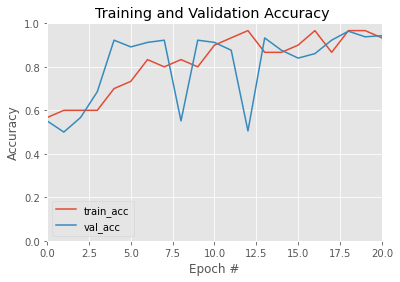

In [10]:
# plot accuracy graphs
plt.style.use("ggplot")
plt.figure()
N = 30
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and Validation Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.xlim([0,20])
plt.ylim([0,1])
plt.savefig('Training and Validation Accuracy.png', bbox_inches='tight')

In [28]:
save_path='C:/Users/ArsalanBangash/Desktop/ComputerVision/FYP/models'
model.save(os.path.join(save_path,"new_mask_no_mask.h5"))

OSError: Unable to create file (unable to truncate a file which is already open)

In [30]:
from keras.models import load_model
#save_path='C:/Users/ArsalanBangash/Desktop/ComputerVision/FYP/models'
new_model=load_model(os.path.join(save_path,"new_mask_no_mask.h5"))

KeyError: 0

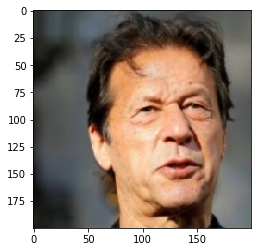

No Masked Face


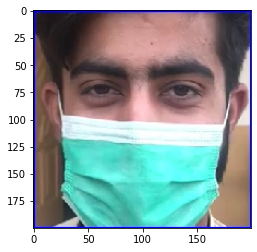

Masked Face 


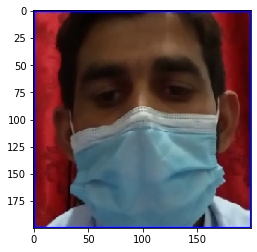

Masked Face 


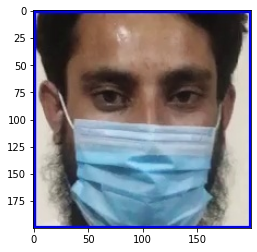

Masked Face 


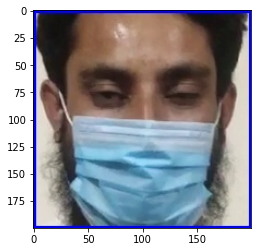

Masked Face 


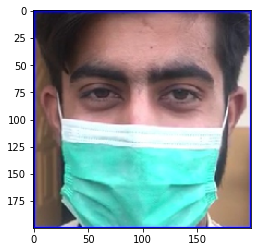

Masked Face 


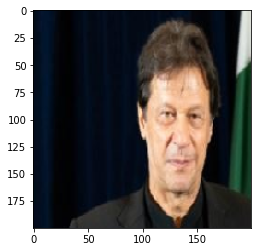

No Masked Face


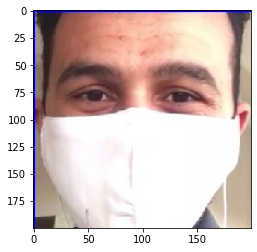

Masked Face 


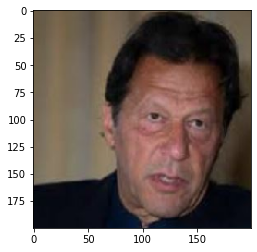

No Masked Face


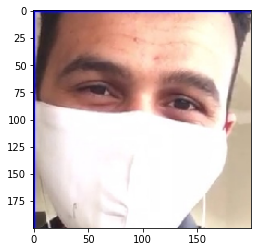

Masked Face 


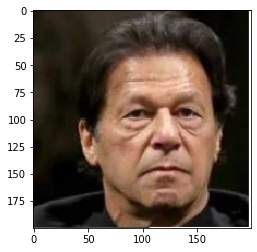

No Masked Face


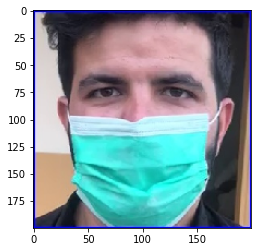

Masked Face 


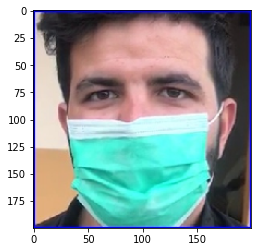

Masked Face 


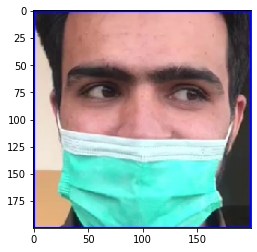

Masked Face 


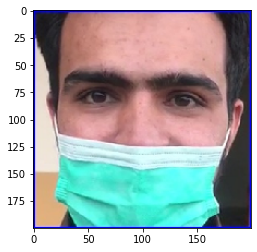

No Masked Face


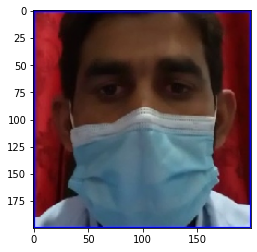

Masked Face 


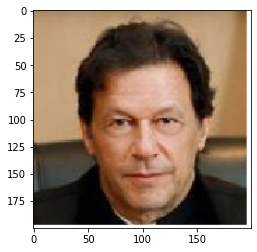

No Masked Face


In [31]:
dir_path='mask_detection/evaluate'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i ,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0:
        print('Masked Face ')
    else:
        print('No Masked Face')
            

In [12]:
# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [12]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [13]:
# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face


In [16]:
# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (200, 200))
        im = image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        images=np.vstack([img_array])
        pred = model.predict(images)
        #print(pred) 
                     
        #name="None matching"
        
        if pred==1:
            cv2.putText(frame,"Mask", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 2)
        elif pred==0:
            cv2.putText(frame,"No Mask", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

AttributeError: module 'tensorflow.keras.preprocessing.image' has no attribute 'fromarray'

In [17]:
video_capture.release()
cv2.destroyAllWindows()